# Showcase Parquet File Proper Opening Sequence

In [1]:
from kerchunk import hdf, combine, df
import fsspec.implementations.reference
from fsspec.implementations.reference import LazyReferenceMapper
from tempfile import TemporaryDirectory

import matplotlib.pyplot as plt

import json

import xarray as xr
import os, sys

In [2]:
pq = '../../test_parqs/parqs/esacci25'

Open Reference File System and use as Mapper for Xarray

In [3]:
fs = fsspec.implementations.reference.ReferenceFileSystem(
    pq, 
    remote_protocol='https', 
    target_protocol="file", 
    lazy=True)

ds = xr.open_dataset(
    fs.get_mapper(), 
    engine="zarr",
    backend_kwargs={"consolidated": False, "decode_times": False}
)

/home/users/dwest77/Documents/kerchunk_dev/kerchunk-builder/showcase/notebooks/../../test_parqs/parqs/esacci24/time/refs.0.parq
/home/users/dwest77/Documents/kerchunk_dev/kerchunk-builder/showcase/notebooks/../../test_parqs/parqs/esacci24/xc/refs.0.parq
/home/users/dwest77/Documents/kerchunk_dev/kerchunk-builder/showcase/notebooks/../../test_parqs/parqs/esacci24/yc/refs.0.parq


/home/users/dwest77/Documents/kerchunk_dev/kerchunk-builder/showcase/notebooks/../../test_parqs/parqs/esacci24/sea_ice_thickness/refs.0.parq
/home/users/dwest77/Documents/kerchunk_dev/kerchunk-builder/showcase/notebooks/../../test_parqs/parqs/esacci24/sea_ice_thickness/refs.1.parq


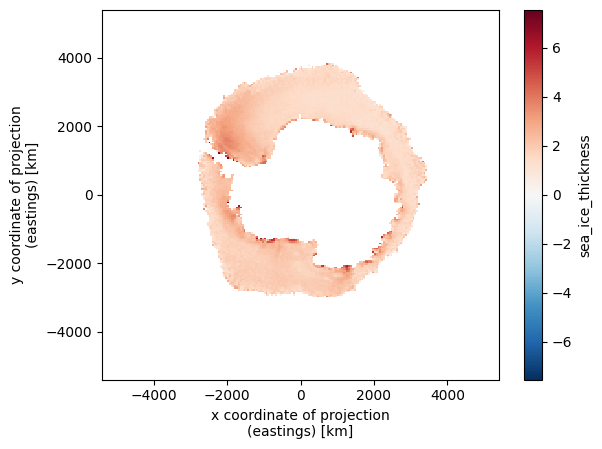

In [4]:
ds['sea_ice_thickness'].mean(dim='time').plot()